In [93]:
from pylab import*
F=0.001            #Fødsel
I=0.05             #Innvandring
POP=500            #Populasjon ved starten
T= 208             #i uker 
N=1000             #antall ganger populasjonen måles over tid
dt=T/N             #Tidsteg

In [94]:
pop=zeros(N)        #Lager en matrise for populasjonen
popder=zeros(N)     #Lager en matrise for den deriverte av populasjonen
tid=zeros(N)        #Lager en matrise for tid

pop[0]=POP        #Setter første populasjonsmåling til start populasjonen
tid[0]=0          #Første måling skjer ved tid = 0 uker

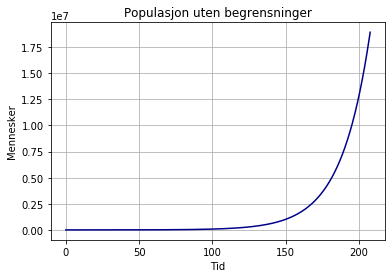

In [95]:
#Bruker Eulers metode for å finne populasjonen over T måneder:
for i in range(N-1):                  #Kjører løkken N ganger
    popder[i]=pop[i]*F + pop[i]*I     #Regner ut endringen i populasjonen fra fødsel + innvandring
    pop[i+1]=pop[i]+popder[i]*dt      #Regner så ut populasjonen for neste måling
    tid[i+1]=tid[i]+dt                
    
#Plotter populasjonen i Alexandria:
plot(tid,pop,color='darkblue')          #pynter litt på grafen :)  
title('Populasjon uten begrensninger')
ylabel('Mennesker')                      
xlabel('Tid')                            
grid()                                   
show()

Populasjonen stiger bare eksponentielt fordi det ikke er noe som gjør at den ikke stiger. 

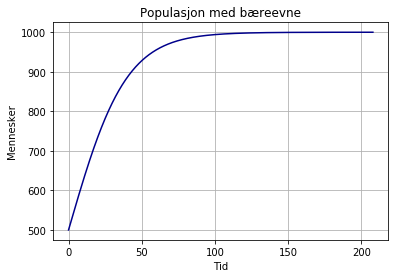

In [96]:
B = 1000         #Bæreevnen

#Resetter initialbetingelsene sånn at de er tilbake til start
pop[0] = POP        
tid[0] = 0

#Gjør det samme som i forrige, men denne gangen med bæreevne. 
for i in range(N-1):
    popder[i]=(pop[i]*F + pop[i]*I)*(1-pop[i]/B)
    pop[i+1]=pop[i]+popder[i]*dt
    tid[i+1]=tid[i]+dt

#plotter den nye grafen
plot(tid,pop,color="darkblue")      
title("Populasjon med bæreevne")
ylabel("Mennesker")
xlabel("Tid")
grid()
show()

Jeg satt bæreevnen til 1000 fordi dette er under en zombieapokalypse og det limiterte tilgang til medisin, mat og strøm. Det er også veldig lite rom å på i Alexandria og ingen vil bo utenfor bymurene fordi der er det farlig.

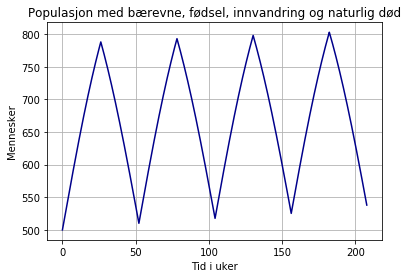

In [97]:
Sommer = 0.001  #Naturlig dødsrate under sommeren
sesong = 26 #Et halvt år i antall uker
etår = 52  #ett år i uker
Vinter = 100  #Siden det er kaldere på vinteren er det høyere dødsrate da

#Resetter intialbetingelsene igjen
pop[0] = POP
tid[0] = 0

for i in range(N-1):
    if tid[i] < sesong and tid[i] >= (sesong-26):  #Dersom det er sommer, starter alltid året med sommer for å øke overlevelsessjansene
        ND = 0.001
        etår = 52
    else:
        ND = Sommer*Vinter           #På vinteren er dødrate mye høyere
        sesong += etår                #Endrer det slik at det til slutt kommer en sommer etter vinteren
        etår = 0                      
    #eulers igjen:
    popder[i]=(pop[i]*F + pop[i]*I - pop[i]*ND)*(1-pop[i]/B)
    pop[i+1]=pop[i]+popder[i]*dt
    tid[i+1]=tid[i]+dt
   
plot(tid, pop, color='darkblue')
title('Populasjon med bærevne, fødsel, innvandring og naturlig død')
ylabel('Mennesker')
xlabel('Tid i uker')
grid()
show()

Her ser vi at populasjonen øker veldig på sommeren og så detter langt ned på vinteren. Dette er fordi jeg satt at det er 100 ganger mer sannsynlig å dø på vinteren enn sommeren. Grunnen til å ha forskjellen er at det er mye kaldere på vintern og da blir man lettere syk, men 100 ganger er litt overdrevent for å få utslag på grafen og vil bli justert ned til noe mer sannsynlig videre.

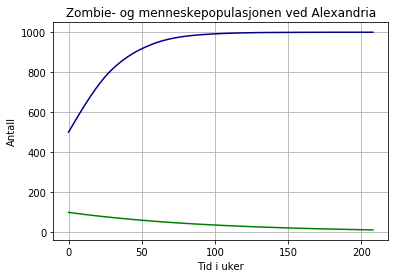

In [98]:
#Initialbetingelser for zombier
ZD = 0.0001           #rate for møte mellom menneske og zombie, hvor zombie dreper menneske
Z = 100               #Zombiepopulasjon etter 0 uker
NDZ = 0.01            #Naturlige dødsraten for zombiene
Vinter = 5           #Hvor mye mer zombiene dør på vinteren

#Lager matriser for zombiepopulasjonen og den deriverte av zombiepopulasjonen
zpop = zeros(N)     #Matrise for zombie populasjonen
zder = zeros(N)     #Deriverte av zombiepopulasjonen

#Initialbetingelser 
zpop[0] = Z            
tid[0] = 0
sesong = 26
pop[0] = POP

for i in range(N-1):
    if tid[i] < sesong and tid[i] >= (sesong-26):
        ND = 0.001
        etår = 52
    else:
        ND = Sommer*Vinter
        sesong += etår
        etår = 0
    popder[i]=(pop[i]*F + pop[i]*I - pop[i]*ND)*(1-pop[i]/B) - pop[i]*ZD  #Trekker fra de som blir drept av zombier
    pop[i+1]=pop[i]+popder[i]*dt
    tid[i+1]=tid[i]+dt
    zder[i]=-zpop[i]*NDZ                    #Her er endringen i antall zombier lik zpop * dødsraten til zombier
    zpop[i+1]=zpop[i]+zder[i]*dt           #Zombiepopulasjonen er da lik start populasjonen + endringen

plot(tid,pop,color="darkblue")
plot(tid,zpop,color="green")
title("Zombie- og menneskepopulasjonen ved Alexandria")
ylabel("Antall")
xlabel("Tid i uker")
grid()
show()

Her ser vi at zombie populasjonen synker sakte men sikkert nedover mens menneskene når bæreevnen og stopper der. Grunnen til dette er at det eneste som påvirker zombiene er den naturlig dødsraten. Så det kommer aldri noen nye zombier.

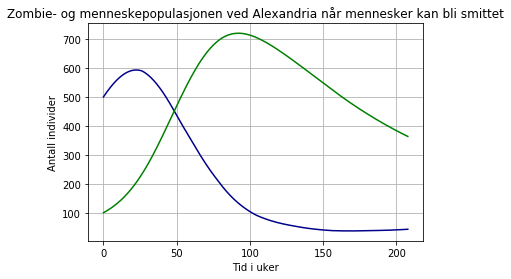

In [99]:
NZ=0.75 #Sannsynligheten for at det kommer en ny zombie når et menneske blir drept


#Initialbetingelser for tid og zombie populasjonen på nytt
pop[0] = POP
zpop[0] = Z            
tid[0] = 0
sesong = 26

for i in range(N-1):
    if pop[i] < 1:                  #for å forhindre at det blir negativ populasjon    
        pop[i] = 0
    else:
        pop[i] = pop[i]
    if tid[i] < sesong and tid[i] >= (sesong-26):
        ND = 0.001
        etår = 52
    else:
        ND = Sommer*Vinter
        sesong += etår
        etår = 0
    popder[i]=(pop[i]*F + pop[i]*I - pop[i]*ND )*(1-pop[i]/B)- zpop[i]*pop[i]*ZD
    pop[i+1]=pop[i]+popder[i]*dt
    tid[i+1]=tid[i]+dt
    zder[i]=-zpop[i]*NDZ + zpop[i]*pop[i]*ZD*NZ         #Legger til at drepte har en sjanse for å bli ny zombie
    zpop[i+1]=zpop[i]+zder[i]*dt
    
    
    
    
plot(tid,pop,color="darkblue")
plot(tid,zpop,color="green")
title("Zombie- og menneskepopulasjonen ved Alexandria når mennesker kan bli smittet")
ylabel("Antall individer")
xlabel("Tid i uker")
grid()
show()

Her ser vi at det øker kraftig med zombier til å starte med men så blir det mindre og mindre zombier etter hvert.

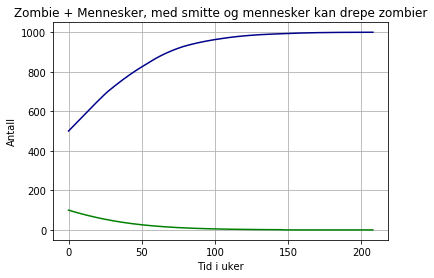

Menneskene overlevde  207.99999999999855 uker


In [100]:
#NY VARIABEL:
DoubleTap =  0.0001       #Raten mennesker kan drepe zombier
uker = dt                 #Antall uker menneskene har overlevd

#Initialbetingelser for tid og zombie populasjonen på nytt
pop[0] = POP
zpop[0] = Z 
tid[0] = 0
sesong = 26


for i in range(N-1):
    if zpop[i]<1:
        zpop[i]=0
    else:
        zpop[i]=zpop[i]
    if tid[i] < sesong and tid[i] >= (sesong-26):
        ND = 0.001
        etår = 52
    else:
        ND = Sommer*Vinter
        sesong += etår
        etår = 0
    popder[i]=(pop[i]*F + pop[i]*I - pop[i]*ND)*(1-pop[i]/B) - pop[i]*zpop[i]*ZD
    if pop[i]<1:
        pop[i+1] = 0
    else:
            uker += dt
            pop[i+1] = pop[i] + popder[i]*dt
    zder[i]=-zpop[i]*NDZ + zpop[i]*pop[i]*ZD*NZ - pop[i]*zpop[i]*DoubleTap
    if zpop[i]<1:
        zpop[i+1]=0
    else:
        zpop[i+1]= zpop[i] + zder[i]*dt
    tid[i+1]=tid[i]+dt
    
    
    
plot(tid,pop,color="darkblue")
plot(tid,zpop,color="green")
title("Zombie + Mennesker, med smitte og mennesker kan drepe zombier")
ylabel("Antall")
xlabel("Tid i uker")
grid()
show()

print("Menneskene overlevde ", uker, "uker")

Nå som menneskene kan sloss tilbake mot zombiene så blir det ikke en sånn vekst av zombier som i forrige graf og de dør fortere ut en tidligere. Her legger jeg også til en telle variabel som teller antall uker menneskene overlever.

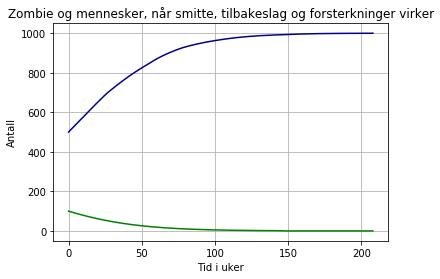

Menneskene overlevde  207.99999999999855 uker


In [102]:
#Ny betingelse for hjelp
Solo = 0                  #Antall uker til neste hjelp er tilgjengelig
Hjelp=30                 #Antall personer som sendes fra Hilltop og Kingdom

#Initialbetingelser for tid og zombie populasjonen på nytt
uker = dt
pop[0] = POP
zpop[0] = Z 
tid[0] = 0
sesong = 26


for i in range(N-1):
    if tid[i] < sesong and tid[i] >= (sesong-26):
        ND = 0.001
        etår = 52
    else:
        ND = Sommer*Vinter
        sesong += etår
        etår = 0

    if 2<pop[i]<100:
        uker += dt
        if Solo<1:
            if pop[i]>1:
                popder[i]=(pop[i]*F + pop[i]*I - pop[i]*ND)*(1-pop[i]/B) - zpop[i]*pop[i]*ZD
                pop[i+1]=pop[i]+popder[i]*dt+Hjelp
                Solo = 10
            else:
                print("Vi koser oss her, men dere får ha lykke til da")
        else:
            Solo = Solo
    elif pop[i]<2:
        pop[i+1]=0
    else:
        popder[i]=(pop[i]*F + pop[i]*I - pop[i]*ND)*(1-pop[i]/B) - zpop[i]*pop[i]*ZD
        pop[i+1]=pop[i]+popder[i]*dt
        uker += dt
        
    tid[i+1]=tid[i]+dt
    zder[i]=-zpop[i]*NDZ + zpop[i]*pop[i]*ZD*NZ - pop[i]*zpop[i]*DoubleTap
    if zpop[i]<1:
        zpop[i+1]=0
    else:
        zpop[i+1]=zpop[i] + zder[i]*dt
    Solo -= 1

plot(tid,pop,color="darkblue")
plot(tid,zpop,color="green")
title("Zombie og mennesker, når smitte, tilbakeslag og forsterkninger virker")
ylabel("Antall")
xlabel("Tid i uker")
grid()
show()
print("Menneskene overlevde ", uker, "uker")

Her skal det komme hjelp fra Hilltop og Kingdom dersom det er mindre enn 100 personer i livet, men det blir det aldri så det kommer ikke noe hjelp. Det kommer heller aldri noen melding om at de ikke gidder å sende hjelp så det blir aldri mindre enn 1 person der.